# Imports

In [1]:
pip install tensorflow keras opencv-python


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Imports

In [2]:
import os
import cv2
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers, models
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

In [4]:
from tensorflow.keras.preprocessing import image
from keras.applications.efficientnet import preprocess_input

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
# folder dataset
happy_folder = "dataset/happy/"
angry_folder = "dataset/angry/"
sad_folder = "dataset/sad/"

limit = 250

In [7]:
# load images
images_happy = [cv2.imread(file) for file in glob.glob(happy_folder+"*.jpg")][:limit]
images_angry = [cv2.imread(file) for file in glob.glob(angry_folder+"*.jpg")][:limit]
images_sad = [cv2.imread(file) for file in glob.glob(sad_folder+"*.jpg")][:limit]

In [8]:
# images labeling
labels_happy = [0] * len(images_happy)
labels_angry = [1] * len(images_angry)
labels_sad = [2] * len(images_sad)

In [9]:
# checking data
happy_count = len(images_happy)
happy_count

250

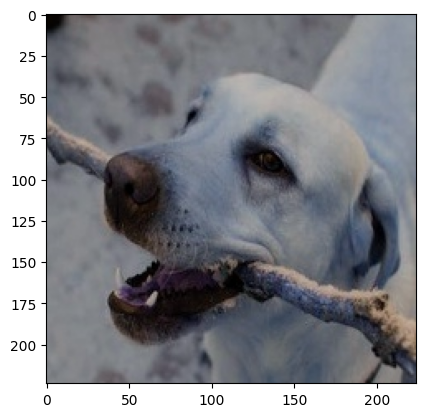

In [10]:
img = np.asarray(images_happy[99])
imgplot = plt.imshow(img)

In [11]:
# resize images to 64x64

common_size = (112,112)
images_happy = [cv2.resize(image, common_size) for image in images_happy]
images_angry = [cv2.resize(image, common_size) for image in images_angry]
images_sad = [cv2.resize(image, common_size) for image in images_sad]

In [12]:
# Concatenate images and labels
X = np.concatenate((images_happy, images_angry, images_sad), axis = 0)
y = np.concatenate((labels_happy, labels_angry, labels_sad), axis = 0)

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

# Assuming X_train and y_train are your training data and labels
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

In [15]:
X_train.shape

(600, 112, 112, 3)

In [16]:
y_train.shape

(600,)

In [17]:
def initialize_model():

    model = models.Sequential()

    model.add(layers.Conv2D(64, (3,3), activation="relu", input_shape=(112, 112, 3)))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(layers.Conv2D(64, (3,3), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(layers.Conv2D(128, (3,3), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(layers.Conv2D(64, (2,2), activation="relu"))
    model.add(layers.MaxPool2D(pool_size=(2,2)))
    
    model.add(layers.Flatten())
    
    model.add(layers.Dense(32, activation='relu'))
    
    model.add(layers.Dense(16, activation='relu'))

    model.add(layers.Dense(3, activation='softmax'))
    
    ### Model compilation
    model.compile(loss='sparse_categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])
       
    
    return model

In [18]:
# Training the model

model = initialize_model()

In [19]:
es = EarlyStopping(patience = 10, restore_best_weights= True)

history = model.fit(X_train, y_train,
                    epochs = 25,
                    batch_size = 64,
                    validation_split = 0.2,
                    callbacks = [es],
                    verbose = 1)

Epoch 1/25
8/8 [==============================] - 5s 610ms/step - loss: 7.6542 - accuracy: 0.2917 - val_loss: 3.7416 - val_accuracy: 0.4000
Epoch 2/25
8/8 [==============================] - 8s 944ms/step - loss: 1.9274 - accuracy: 0.3688 - val_loss: 1.2512 - val_accuracy: 0.3833
Epoch 3/25
8/8 [==============================] - 9s 1s/step - loss: 1.1760 - accuracy: 0.3292 - val_loss: 1.1224 - val_accuracy: 0.3500
Epoch 4/25
8/8 [==============================] - 8s 954ms/step - loss: 1.0573 - accuracy: 0.4375 - val_loss: 1.0833 - val_accuracy: 0.4333
Epoch 5/25
8/8 [==============================] - 8s 955ms/step - loss: 1.0193 - accuracy: 0.4792 - val_loss: 1.0520 - val_accuracy: 0.4167
Epoch 6/25
8/8 [==============================] - 7s 851ms/step - loss: 0.9644 - accuracy: 0.5875 - val_loss: 1.0605 - val_accuracy: 0.4167
Epoch 7/25
8/8 [==============================] - 8s 919ms/step - loss: 0.8920 - accuracy: 0.6208 - val_loss: 1.0331 - val_accuracy: 0.3750
Epoch 8/25
8/8 [=======

In [20]:
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))
    
    # ----Loss----
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('Model loss')
    ax[0].set_xlabel('Epoch')
    ax[0].set_ylabel('Loss')
    ax[0].legend(['Train', 'Validation'], loc= 'best')
    ax[0].grid(axis='x', linewidth=0.5)
    ax[0].grid(axis='y', linewidth=0.5)
    
    # ----Accuracy----
    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])
    ax[1].set_title('Model accuracy')
    ax[1].set_xlabel('Epoch')
    ax[1].set_ylabel('Accuracy')
    ax[1].legend(['Train', 'Validation'], loc= 'best')
    ax[1].grid(axis='x', linewidth=0.5)
    ax[1].grid(axis='y', linewidth=0.5)
    
    if title:
        fig.suptitle(title)

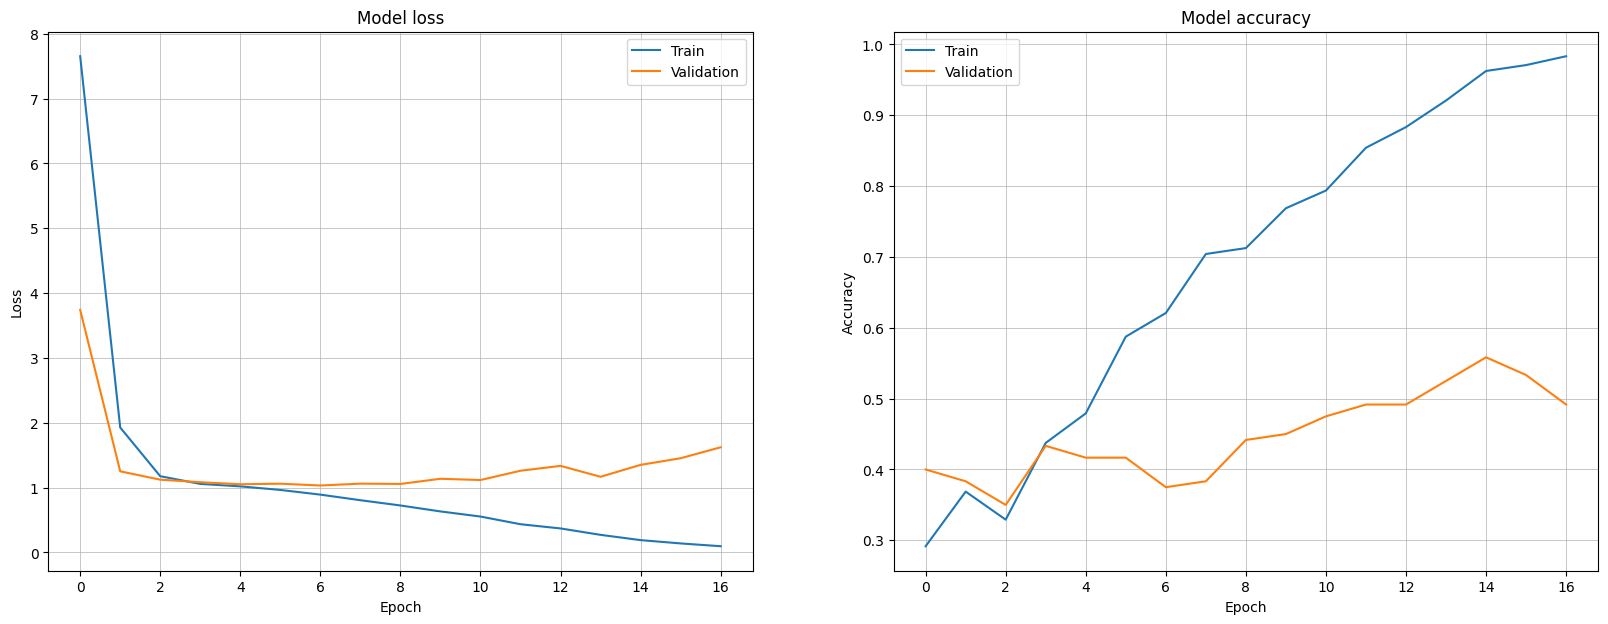

In [21]:
plot_loss_accuracy(history, title=None)

In [22]:
evaluation = model.evaluate(X_test, y_test)

5/5 [==============================] - 1s 171ms/step - loss: 1.0306 - accuracy: 0.4400


In [23]:
print(f'Model accuracy is {round(evaluation[1]*100,2)} %')

Model accuracy is 44.0 %


In [24]:
model.save('basic_model_44%.h5')

/Users/mirmachr/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# VGG16 Model

In [25]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input as preprocess_input_vgg16
from tensorflow.keras.callbacks import LearningRateScheduler

# Function to update the learning rate
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [26]:
def initialize_vgg16_model():
    # Load the pre-trained VGG16 model without the top (fully connected) layers
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=(112, 112, 3))

    # Freeze the layers of the pre-trained VGG16 model
    for layer in base_model.layers:
        layer.trainable = False

    # Create a Sequential model
    model = Sequential()

    # Add the pre-trained VGG16 model as the first layer
    model.add(base_model)


    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))

    # Model compilation
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [27]:
model = initialize_vgg16_model()

In [28]:
es = EarlyStopping(patience = 5, restore_best_weights= True)

history = model.fit(X_train, y_train,
                    epochs = 25,
                    batch_size = 32,
                    validation_split = 0.2,
                    callbacks = [es],
                    verbose = 1)

# callbacks = [EarlyStopping(patience=10, restore_best_weights=True), LearningRateScheduler(scheduler)]

# # Fit the model
# history = model.fit(
#     train_generator,  # Assuming you are still using the augmented data
#     epochs=25,
#     validation_split=0.2,
#     callbacks=callbacks,
#     verbose=1)

Epoch 1/25
15/15 [==============================] - 58s 4s/step - loss: 41.6824 - accuracy: 0.5292 - val_loss: 11.1772 - val_accuracy: 0.6917
Epoch 2/25
15/15 [==============================] - 40s 3s/step - loss: 7.6603 - accuracy: 0.7771 - val_loss: 14.6604 - val_accuracy: 0.6583
Epoch 3/25
15/15 [==============================] - 38s 3s/step - loss: 1.7160 - accuracy: 0.9042 - val_loss: 4.9530 - val_accuracy: 0.8083
Epoch 4/25
15/15 [==============================] - 38s 3s/step - loss: 0.8092 - accuracy: 0.9396 - val_loss: 5.1357 - val_accuracy: 0.8083
Epoch 5/25
15/15 [==============================] - 39s 3s/step - loss: 0.1512 - accuracy: 0.9771 - val_loss: 3.4653 - val_accuracy: 0.8417
Epoch 6/25
15/15 [==============================] - 39s 3s/step - loss: 0.1858 - accuracy: 0.9812 - val_loss: 4.0073 - val_accuracy: 0.8333
Epoch 7/25
15/15 [==============================] - 39s 3s/step - loss: 0.1635 - accuracy: 0.9812 - val_loss: 4.8927 - val_accuracy: 0.8167
Epoch 8/25
15/15 

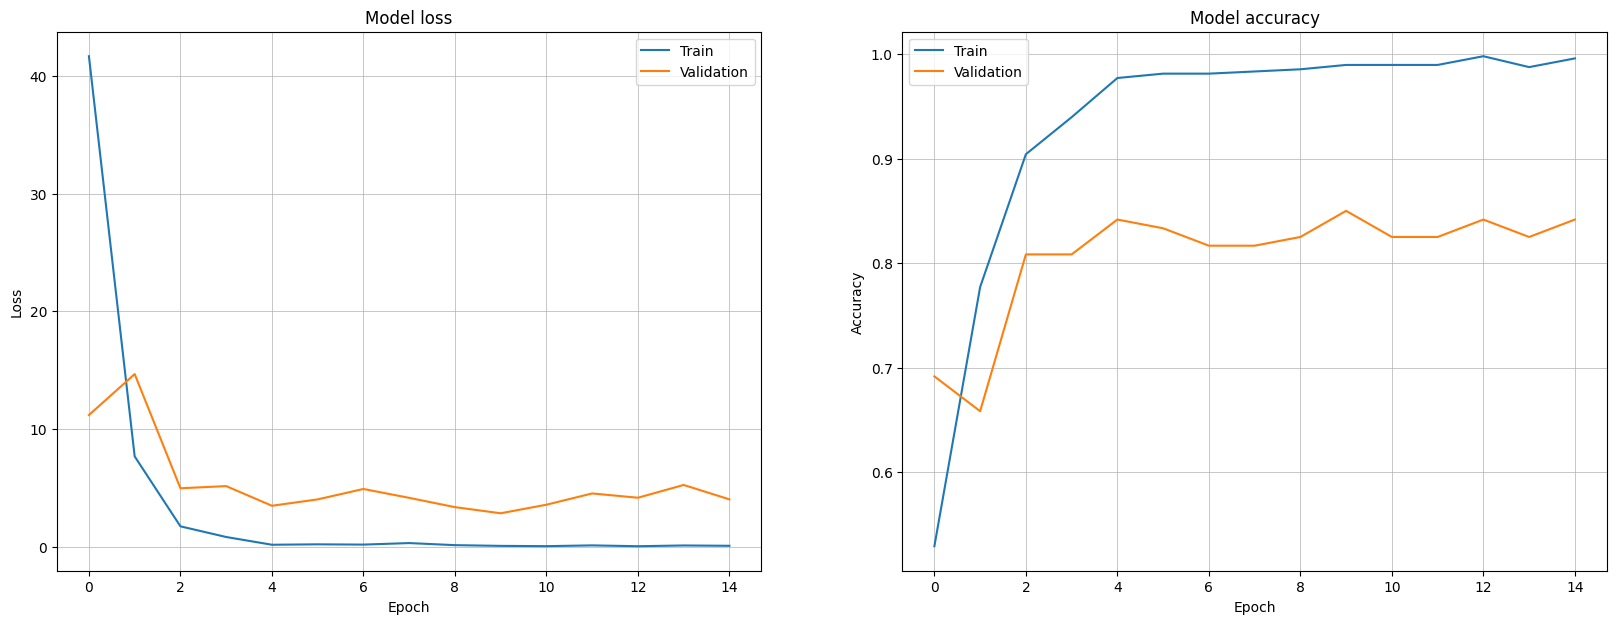

In [29]:
plot_loss_accuracy(history, title=None)

In [30]:
evaluation = model.evaluate(X_test, y_test)

5/5 [==============================] - 10s 2s/step - loss: 2.7831 - accuracy: 0.8200


In [31]:
print(f'Model accuracy is {round(evaluation[1]*100,2)} %')

Model accuracy is 82.0 %


In [32]:
model.save('vgg16_model_82%.h5')

# VGG19 Model

In [33]:
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input as preprocess_input_vgg19

In [34]:
def initialize_vgg19_model():
    # Load the pre-trained VGG19 model without the top (fully connected) layers
    base_model = VGG19(weights='imagenet', include_top=False, input_shape=(112, 112, 3))

    # Freeze the layers of the pre-trained VGG19 model
    for layer in base_model.layers:
        layer.trainable = False

    # Create a Sequential model
    model = Sequential()

    # Add the pre-trained VGG19 model as the first layer
    model.add(base_model)


    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))

    # Model compilation
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [35]:
model = initialize_vgg19_model()

In [36]:
es = EarlyStopping(patience = 5, restore_best_weights= True)

history = model.fit(X_train, y_train,
                    epochs = 25,
                    batch_size = 32,
                    validation_split = 0.2,
                    callbacks = [es],
                    verbose = 1)

Epoch 1/25
15/15 [==============================] - 49s 3s/step - loss: 36.9192 - accuracy: 0.5396 - val_loss: 9.8497 - val_accuracy: 0.6500
Epoch 2/25
15/15 [==============================] - 49s 3s/step - loss: 5.4545 - accuracy: 0.8250 - val_loss: 5.5725 - val_accuracy: 0.8000
Epoch 3/25
15/15 [==============================] - 48s 3s/step - loss: 1.6901 - accuracy: 0.9271 - val_loss: 3.3011 - val_accuracy: 0.8333
Epoch 4/25
15/15 [==============================] - 53s 3s/step - loss: 0.3179 - accuracy: 0.9604 - val_loss: 3.5679 - val_accuracy: 0.8417
Epoch 5/25
15/15 [==============================] - 47s 3s/step - loss: 0.4202 - accuracy: 0.9729 - val_loss: 3.1397 - val_accuracy: 0.8417
Epoch 6/25
15/15 [==============================] - 49s 3s/step - loss: 0.2544 - accuracy: 0.9771 - val_loss: 2.8871 - val_accuracy: 0.8750
Epoch 7/25
15/15 [==============================] - 48s 3s/step - loss: 0.1841 - accuracy: 0.9875 - val_loss: 2.8724 - val_accuracy: 0.8833
Epoch 8/25
15/15 [=

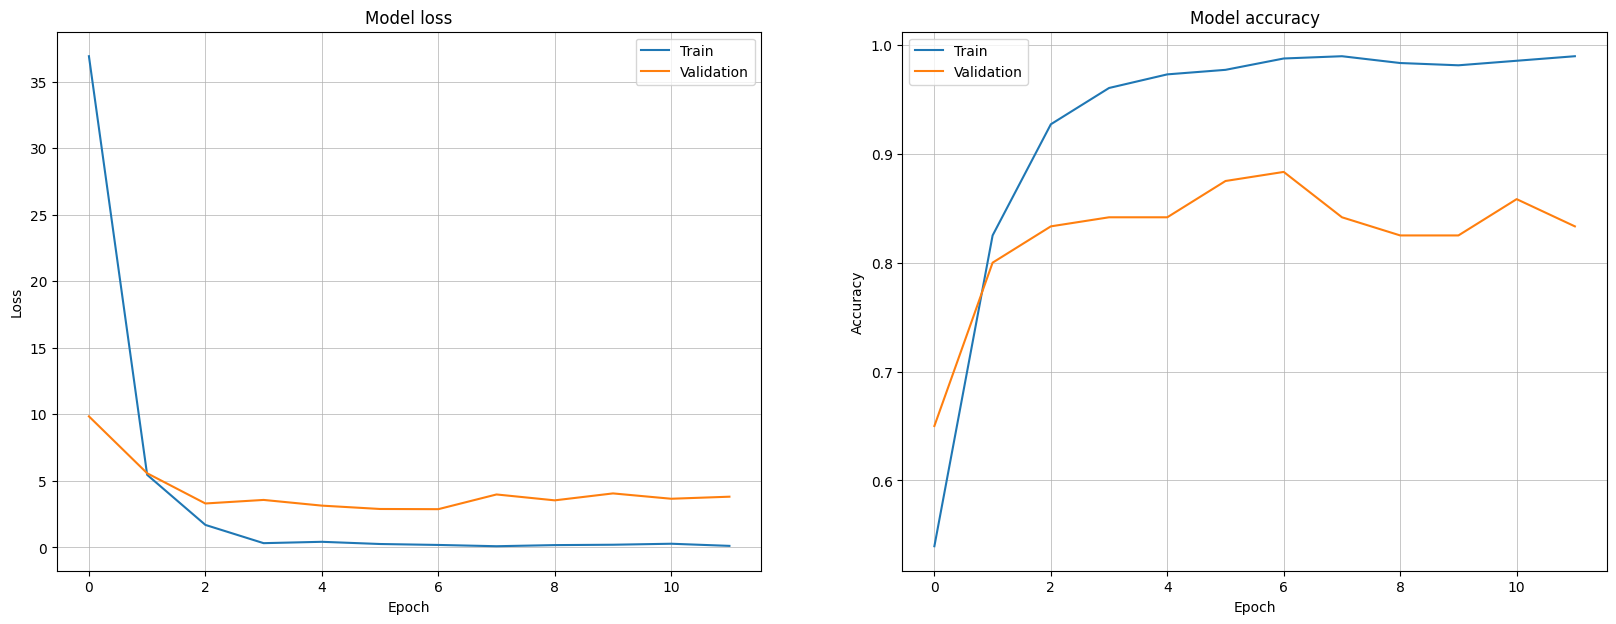

In [37]:
plot_loss_accuracy(history, title=None)

In [38]:
evaluation = model.evaluate(X_test, y_test)

5/5 [==============================] - 12s 2s/step - loss: 3.6073 - accuracy: 0.7867


In [39]:
print(f'Model accuracy is {round(evaluation[1]*100,2)} %')

Model accuracy is 78.67 %


In [40]:
model.save('vgg19_model_78%.h5')

# EfficientNetB0

In [41]:
from tensorflow.keras.applications.efficientnet import preprocess_input
from keras.applications import EfficientNetB0

In [42]:
def initialize_effnetB0_model():
    # Load the pre-trained EfficientNetB0 model without the top (fully connected) layers
    base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(112, 112, 3))

    # Freeze the layers of the pre-trained EfficientNetB0 model
    for layer in base_model.layers:
        layer.trainable = False

    # Create a Sequential model
    model = Sequential()


    # Add the pre-trained EfficientNetB0 model as the first layer
    model.add(base_model)


    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(3, activation='softmax'))

    # Model compilation
    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [43]:
model = initialize_effnetB0_model()

In [44]:
es = EarlyStopping(patience = 5, restore_best_weights= True)

history = model.fit(X_train, y_train,
                    epochs = 25,
                    batch_size = 32,
                    validation_split = 0.2,
                    callbacks = [es],
                    verbose = 1)

Epoch 1/25
15/15 [==============================] - 10s 359ms/step - loss: 2.7075 - accuracy: 0.5708 - val_loss: 1.1922 - val_accuracy: 0.7250
Epoch 2/25
15/15 [==============================] - 4s 292ms/step - loss: 0.4810 - accuracy: 0.8542 - val_loss: 0.6465 - val_accuracy: 0.8083
Epoch 3/25
15/15 [==============================] - 5s 307ms/step - loss: 0.1029 - accuracy: 0.9688 - val_loss: 0.5801 - val_accuracy: 0.8083
Epoch 4/25
15/15 [==============================] - 4s 296ms/step - loss: 0.0537 - accuracy: 0.9854 - val_loss: 0.4794 - val_accuracy: 0.8500
Epoch 5/25
15/15 [==============================] - 4s 296ms/step - loss: 0.0284 - accuracy: 0.9937 - val_loss: 0.4613 - val_accuracy: 0.8500
Epoch 6/25
15/15 [==============================] - 4s 291ms/step - loss: 0.0312 - accuracy: 0.9896 - val_loss: 0.5155 - val_accuracy: 0.8417
Epoch 7/25
15/15 [==============================] - 4s 298ms/step - loss: 0.0188 - accuracy: 0.9958 - val_loss: 0.4931 - val_accuracy: 0.8667
Epoch

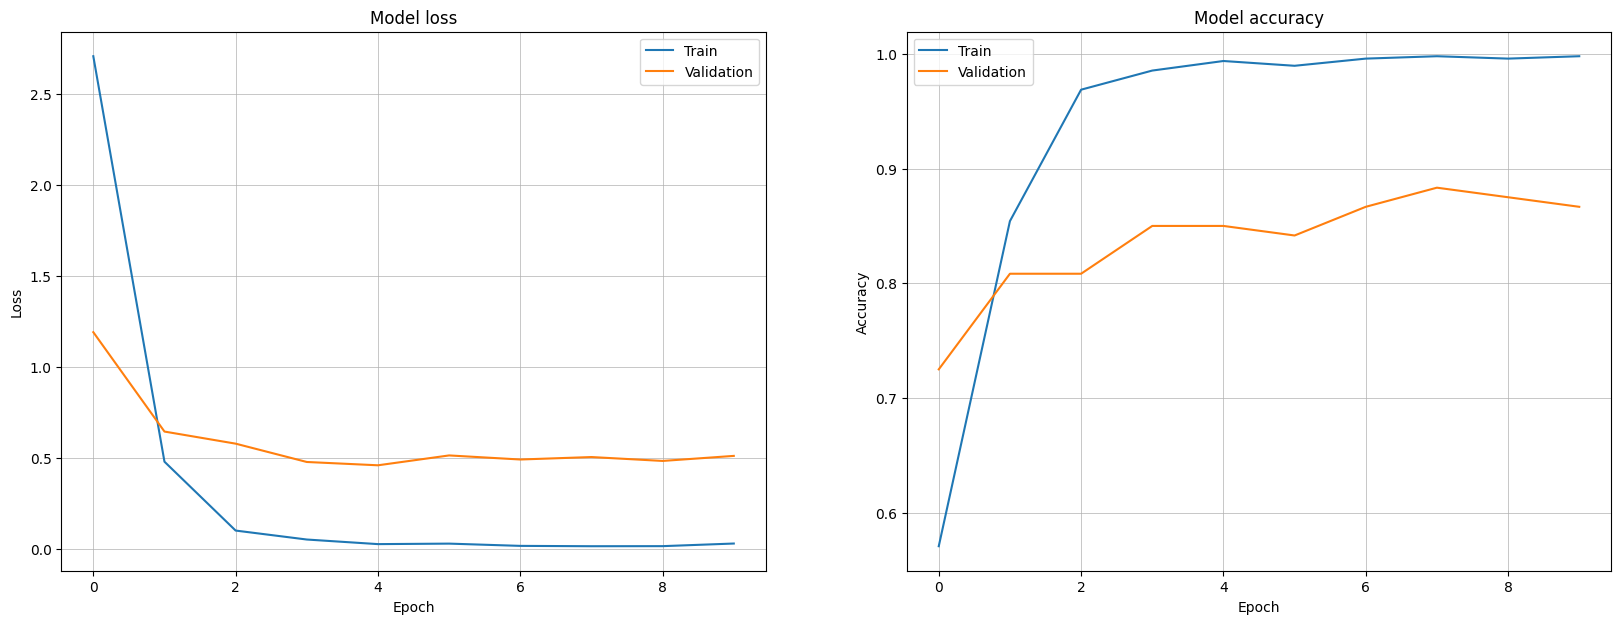

In [45]:
plot_loss_accuracy(history, title=None)

In [46]:
evaluation = model.evaluate(X_test, y_test)

5/5 [==============================] - 1s 283ms/step - loss: 0.6517 - accuracy: 0.8333


In [47]:
print(f'Model accuracy is {round(evaluation[1]*100,2)} %')

Model accuracy is 83.33 %


In [48]:
model.save('EfficientNetB0_model_83%.h5')

In [49]:
predictions = model.predict(X_test)

5/5 [==============================] - 2s 111ms/step


In [50]:
def load_and_preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(112, 112))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

In [52]:
from tensorflow.keras.models import load_model

# Load your trained model
# Replace 'path_to_your_model' with the path to your trained model file
model = load_model('EfficientNetB0_model_83%.h5')

In [53]:
# Replace 'path_to_your_image' with the path to your animal image
img_array = load_and_preprocess_image('dataset/sad/071.jpg')

In [54]:
# Make a prediction
prediction = model.predict(img_array)

1/1 [==============================] - 1s 1s/step


In [55]:
# Decode the prediction
emotion = np.argmax(prediction)
emotions = ['Happy', 'Angry', 'Sad']
predicted_emotion = emotions[emotion]

print("Predicted Emotion:", predicted_emotion)

Predicted Emotion: Sad
